# 1. Preparation

## 1.1 Import libraries
import all the modules, functions and objects

In [1]:
import pandas
import pylab
import numpy as np
import seaborn as sns
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn import svm
import sklearn.metrics
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from yellowbrick.model_selection import LearningCurve
from yellowbrick.model_selection import ValidationCurve
from sklearn.model_selection import StratifiedKFold

## 1.2 import data and format missing data

In [2]:
dataset = pandas.read_csv('diabetes.csv')
diabetes_data_copy = dataset.copy(deep = True)
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(), inplace = True)
diabetes_data_copy['BloodPressure'].fillna(diabetes_data_copy['BloodPressure'].mean(), inplace = True)
diabetes_data_copy['SkinThickness'].fillna(diabetes_data_copy['SkinThickness'].median(), inplace = True)
diabetes_data_copy['Insulin'].fillna(diabetes_data_copy['Insulin'].median(), inplace = True)
diabetes_data_copy['BMI'].fillna(diabetes_data_copy['BMI'].median(), inplace = True)

## 1.3 Standard Scaler

In [3]:
sc_X = StandardScaler()
X =  pandas.DataFrame(sc_X.fit_transform(diabetes_data_copy.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
y = diabetes_data_copy.Outcome

/Users/sunshuhan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/sunshuhan/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


## 1.4 Split train and test Dataset
split the loaded dataset into two, 80% of which we will use to train our models and 20% that we will hold back as a test dataset.

In [4]:
test_size = 0.20
seed = 7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)

# 2. modeling

## 2.1 SVM

In [5]:
parameters =[{'kernel': ['rbf', 'linear'], 'C': [.01, .1, 1, 10, 100, 1000]}]
svm_model=GridSearchCV(estimator=svm.SVC(),param_grid=parameters,cv=5,n_jobs=-1,scoring='precision')
svm_model.fit(X_train,Y_train)
print(svm_model.best_params_)

prediction=svm_model.predict(X_test)
print('Accuracy for SVM is', sklearn.metrics.accuracy_score(prediction,Y_test))
    

{'C': 0.1, 'kernel': 'rbf'}
Accuracy for SVM is 0.7727272727272727


/Users/sunshuhan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/sunshuhan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## 2.2 Logistic Regression

In [6]:
parameters =[{'C': [.01, .1, 1, 10, 100, 1000]}]
lr_model=GridSearchCV(estimator=LogisticRegression(),param_grid=parameters,cv=5,n_jobs=-1,scoring='precision')
#lr_model = LogisticRegression()
lr_model.fit(X_train,Y_train)
print(lr_model.best_params_)

prediction=lr_model.predict(X_test)
print('The accuracy of the Logistic Regression is',sklearn.metrics.accuracy_score(prediction,Y_test))

{'C': 1}
The accuracy of the Logistic Regression is 0.7727272727272727


/Users/sunshuhan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/sunshuhan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# 3 learn curve and validate curve

## 3.1 learn curve of SVM

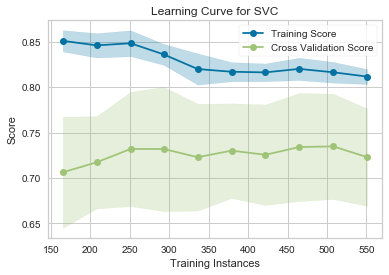

In [7]:
cv = StratifiedKFold(10)
sizes = np.linspace(0.3, 1.0, 10)

viz = LearningCurve(
    svm.SVC(), cv=cv, train_sizes=sizes,
    scoring='f1_weighted', n_jobs=4
)
viz.fit(X_train,Y_train)
viz.poof()




## 3.2 learn curve of Logistic Regression

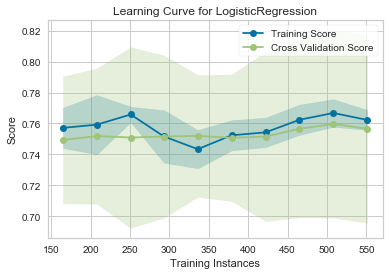

In [8]:
cv = StratifiedKFold(10)
sizes = np.linspace(0.3, 1.0, 10)

viz = LearningCurve(
    LogisticRegression(), cv=cv, train_sizes=sizes,
    scoring='f1_weighted', n_jobs=4
)
viz.fit(X_train,Y_train)
viz.poof()


## 3.3 validate curve of SVM

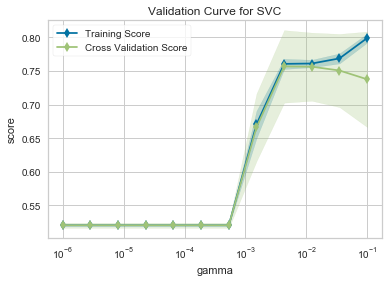

In [9]:
# Create the validation curve visualizer
cv = StratifiedKFold(12)
param_range = np.logspace(-6, -1, 12)

viz = ValidationCurve(
    svm.SVC(), param_name="gamma", param_range=param_range,
    logx=True, cv=cv, scoring="f1_weighted", n_jobs=8,
)

viz.fit(X_train,Y_train)
viz.poof()


## 3.4 validate curve of Logistic Regression

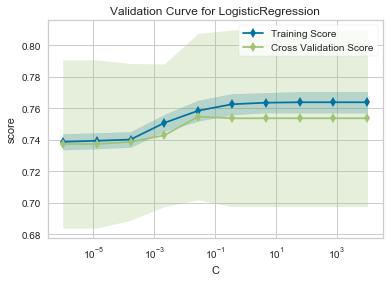

In [10]:
# Create the validation curve visualizer
cv = StratifiedKFold(12)
param_range = np.logspace(-6, 4, 10)

viz = ValidationCurve(
    LogisticRegression(), param_name="C", param_range=param_range,
    logx=True, cv=cv, scoring="f1_weighted", n_jobs=8,
)

viz.fit(X_train,Y_train)
viz.poof()


# 4 Ensembling

In [11]:

linear_svc=svm.SVC(kernel='linear',C=10,gamma=10,probability=True)
radial_svm=svm.SVC(kernel='rbf',C=0.1,gamma=10,probability=True)
lr=LogisticRegression(C=1)

ensemble_rad_lr_lin=VotingClassifier(estimators=[('Radial_svm', radial_svm), ('Logistic Regression', lr),('Linear_svm',linear_svc)], 
                       voting='soft', weights=[2,1,3]).fit(X_train,Y_train)
print('The ensembled model with all the 3 classifiers is:',ensemble_rad_lr_lin.score(X_test,Y_test))

The ensembled model with all the 3 classifiers is: 0.7857142857142857


/Users/sunshuhan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
